In [1]:
import networkx as nx
import markov_clustering as mc
import numpy as np
import scipy as sp
import pandas as pd
from pprint import pprint
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("4932.protein.links.v11.5.txt", sep=" ")
nodes = set(df["protein1"])

df = df[df.combined_score >= 700]
G = nx.from_pandas_edgelist(df, "protein1", "protein2")

new = nodes - set(G.nodes)
for node in new:
    G.add_node(node)
    
essential = pd.read_csv("essential.csv", header = None, usecols = [1])
essential = essential[1].tolist()

for protein in essential:
    name = "4932." + protein
    if name in G.nodes():
        G.remove_node(name)

### Betweenness centrality

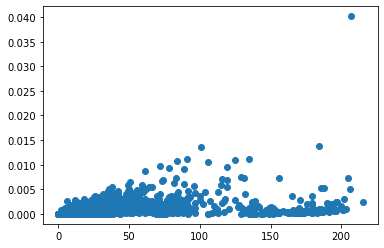

In [3]:
bc = nx.betweenness_centrality(G)
deg = {}
for n, d in G.degree:
    deg[n] = d

bc_deg = {}
for key in bc.keys():
    for k in deg.keys():
        if k == key:
            bc_deg[key] = (bc[key], deg[k])

all_values = bc_deg.values()
x = []
y = []
for a in all_values:
    x.append(a[1])
    y.append(a[0])
plt.scatter(x, y)

### Closeness centrality

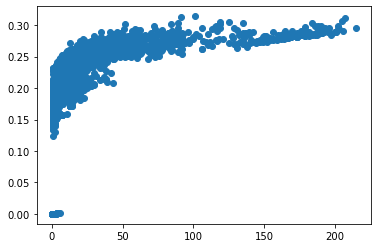

In [4]:
c = nx.closeness_centrality(G)
c_deg = {}
for key in c.keys():
    for k in deg.keys():
        if k == key:
            c_deg[key] = (c[key], deg[k])
            
all_value = c_deg.values()
x = []
y = []
for a in all_value:
    x.append(a[1])
    y.append(a[0])
plt.scatter(x, y)

### Eigenvector centrality

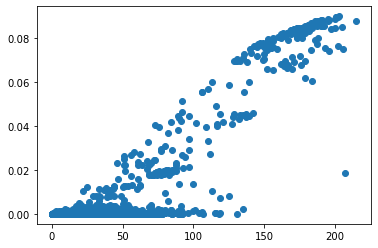

In [5]:
e = nx.eigenvector_centrality(G)
e_deg = {}
for key in e.keys():
    for k in deg.keys():
        if k == key:
            e_deg[key] = (e[key], deg[k])

            all_value = e_deg.values()
x = []
y = []
for a in all_value:
    x.append(a[1])
    y.append(a[0])
plt.scatter(x, y)